In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)

seed 3


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(1040.3992)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 930.93196  validloss 548.64564±0.00000  bestvalidloss 548.64564  last_update 0
train: iter 1  trainloss 540.92762  validloss 504.33754±0.00000  bestvalidloss 504.33754  last_update 0
train: iter 2  trainloss 518.77472  validloss 487.92977±0.00000  bestvalidloss 487.92977  last_update 0
train: iter 3  trainloss 498.25149  validloss 478.66071±0.00000  bestvalidloss 478.66071  last_update 0
train: iter 4  trainloss 478.69146  validloss 465.88599±0.00000  bestvalidloss 465.88599  last_update 0
train: iter 5  trainloss 446.88643  validloss 449.44622±0.00000  bestvalidloss 449.44622  last_update 0
train: iter 6  trainloss 348.03149  validloss 392.06709±0.00000  bestvalidloss 392.06709  last_update 0
train: iter 7  trainloss 242.49964  validloss 228.96654±0.00000  bestvalidloss 228.96654  last_update 0
train: iter 8  trainloss 191.23077  validloss 174.71710±0.00000  bestvalidloss 174.71710  last_update 0
train: iter 9  trainloss 150.51340  validloss

train: iter 77  trainloss -410.19810  validloss -480.69770±0.00000  bestvalidloss -480.69770  last_update 0
train: iter 78  trainloss -419.68517  validloss -461.24156±0.00000  bestvalidloss -480.69770  last_update 1
train: iter 79  trainloss -431.22695  validloss -491.09596±0.00000  bestvalidloss -491.09596  last_update 0
train: iter 80  trainloss -411.84945  validloss -463.79628±0.00000  bestvalidloss -491.09596  last_update 1
train: iter 81  trainloss -403.30781  validloss -489.39639±0.00000  bestvalidloss -491.09596  last_update 2
train: iter 82  trainloss -437.64956  validloss -496.12560±0.00000  bestvalidloss -496.12560  last_update 0
train: iter 83  trainloss -451.89302  validloss -523.04469±0.00000  bestvalidloss -523.04469  last_update 0
train: iter 84  trainloss -447.81227  validloss -523.44221±0.00000  bestvalidloss -523.44221  last_update 0
train: iter 85  trainloss -463.42298  validloss -526.39394±0.00000  bestvalidloss -526.39394  last_update 0
train: iter 86  trainloss -4

train: iter 153  trainloss -604.34714  validloss -644.95528±0.00000  bestvalidloss -737.43078  last_update 1
train: iter 154  trainloss -607.43739  validloss -737.63595±0.00000  bestvalidloss -737.63595  last_update 0
train: iter 155  trainloss -621.27185  validloss -718.77420±0.00000  bestvalidloss -737.63595  last_update 1
train: iter 156  trainloss -629.04182  validloss -714.97394±0.00000  bestvalidloss -737.63595  last_update 2
train: iter 157  trainloss -622.38945  validloss -727.83518±0.00000  bestvalidloss -737.63595  last_update 3
train: iter 158  trainloss -632.62202  validloss -736.85038±0.00000  bestvalidloss -737.63595  last_update 4
train: iter 159  trainloss -634.82490  validloss -744.45310±0.00000  bestvalidloss -744.45310  last_update 0
train: iter 160  trainloss -633.79067  validloss -739.21219±0.00000  bestvalidloss -744.45310  last_update 1
train: iter 161  trainloss -632.39030  validloss -747.67614±0.00000  bestvalidloss -747.67614  last_update 0
train: iter 162  tr

train: iter 229  trainloss -657.47354  validloss -773.65744±0.00000  bestvalidloss -786.26206  last_update 7
train: iter 230  trainloss -674.10066  validloss -786.36715±0.00000  bestvalidloss -786.36715  last_update 0
train: iter 231  trainloss -653.49951  validloss -779.52498±0.00000  bestvalidloss -786.36715  last_update 1
train: iter 232  trainloss -668.57316  validloss -784.34928±0.00000  bestvalidloss -786.36715  last_update 2
train: iter 233  trainloss -671.48957  validloss -739.58238±0.00000  bestvalidloss -786.36715  last_update 3
train: iter 234  trainloss -664.90693  validloss -764.11982±0.00000  bestvalidloss -786.36715  last_update 4
train: iter 235  trainloss -661.12155  validloss -591.09916±0.00000  bestvalidloss -786.36715  last_update 5
train: iter 236  trainloss -622.07627  validloss -747.16578±0.00000  bestvalidloss -786.36715  last_update 6
train: iter 237  trainloss -650.79392  validloss -714.69047±0.00000  bestvalidloss -786.36715  last_update 7
train: iter 238  tr

train: iter 304  trainloss -673.09604  validloss -798.09933±0.00000  bestvalidloss -798.09933  last_update 0
train: iter 305  trainloss -663.52851  validloss -689.71745±0.00000  bestvalidloss -798.09933  last_update 1
train: iter 306  trainloss -678.71352  validloss -765.86602±0.00000  bestvalidloss -798.09933  last_update 2
train: iter 307  trainloss -640.20572  validloss -664.66019±0.00000  bestvalidloss -798.09933  last_update 3
train: iter 308  trainloss -641.97531  validloss -791.54694±0.00000  bestvalidloss -798.09933  last_update 4
train: iter 309  trainloss -659.58302  validloss -783.54022±0.00000  bestvalidloss -798.09933  last_update 5
train: iter 310  trainloss -639.14894  validloss -796.32788±0.00000  bestvalidloss -798.09933  last_update 6
train: iter 311  trainloss -658.46000  validloss -766.69327±0.00000  bestvalidloss -798.09933  last_update 7
train: iter 312  trainloss -668.44912  validloss -790.01773±0.00000  bestvalidloss -798.09933  last_update 8
train: iter 313  tr

train: iter 379  trainloss -681.72109  validloss -801.74976±0.00000  bestvalidloss -813.05741  last_update 3
train: iter 380  trainloss -676.75499  validloss -787.86225±0.00000  bestvalidloss -813.05741  last_update 4
train: iter 381  trainloss -683.33798  validloss -802.43390±0.00000  bestvalidloss -813.05741  last_update 5
train: iter 382  trainloss -694.84893  validloss -710.05807±0.00000  bestvalidloss -813.05741  last_update 6
train: iter 383  trainloss -673.49672  validloss -776.40023±0.00000  bestvalidloss -813.05741  last_update 7
train: iter 384  trainloss -664.50283  validloss -771.18597±0.00000  bestvalidloss -813.05741  last_update 8
train: iter 385  trainloss -675.07120  validloss -786.84051±0.00000  bestvalidloss -813.05741  last_update 9
train: iter 386  trainloss -587.72411  validloss -807.11963±0.00000  bestvalidloss -813.05741  last_update 10
train: iter 387  trainloss -645.04428  validloss -609.41329±0.00000  bestvalidloss -813.05741  last_update 11
train: iter 388  

train: iter 454  trainloss -673.10204  validloss -735.48077±0.00000  bestvalidloss -816.28357  last_update 16
train: iter 455  trainloss -659.12752  validloss -103.29385±0.00000  bestvalidloss -816.28357  last_update 17
train: iter 456  trainloss -692.35495  validloss -808.15323±0.00000  bestvalidloss -816.28357  last_update 18
train: iter 457  trainloss -694.66959  validloss -808.87964±0.00000  bestvalidloss -816.28357  last_update 19
train: iter 458  trainloss -708.04023  validloss -810.39228±0.00000  bestvalidloss -816.28357  last_update 20
train: iter 459  trainloss -699.74609  validloss -816.59361±0.00000  bestvalidloss -816.59361  last_update 0
train: iter 460  trainloss -696.91868  validloss -785.22500±0.00000  bestvalidloss -816.59361  last_update 1
train: iter 461  trainloss -707.48466  validloss -818.83554±0.00000  bestvalidloss -818.83554  last_update 0
train: iter 462  trainloss -697.88041  validloss -742.55506±0.00000  bestvalidloss -818.83554  last_update 1
train: iter 46

train: iter 529  trainloss -710.33167  validloss -815.38718±0.00000  bestvalidloss -820.70928  last_update 14
train: iter 530  trainloss -718.63053  validloss -805.12500±0.00000  bestvalidloss -820.70928  last_update 15
train: iter 531  trainloss -710.96695  validloss -818.72810±0.00000  bestvalidloss -820.70928  last_update 16
train: iter 532  trainloss -706.34371  validloss -775.02652±0.00000  bestvalidloss -820.70928  last_update 17
train: iter 533  trainloss -682.82497  validloss -808.94259±0.00000  bestvalidloss -820.70928  last_update 18
train: iter 534  trainloss -708.87542  validloss -778.56359±0.00000  bestvalidloss -820.70928  last_update 19
train: iter 535  trainloss -716.73754  validloss -813.83961±0.00000  bestvalidloss -820.70928  last_update 20
train: iter 536  trainloss -690.62424  validloss -777.47184±0.00000  bestvalidloss -820.70928  last_update 21
train: iter 537  trainloss -711.23835  validloss -799.28571±0.00000  bestvalidloss -820.70928  last_update 22
train: ite

train: iter 604  trainloss -688.43544  validloss -795.71280±0.00000  bestvalidloss -820.70928  last_update 89
train: iter 605  trainloss -718.17982  validloss -798.25352±0.00000  bestvalidloss -820.70928  last_update 90
train: iter 606  trainloss -714.72109  validloss -817.57453±0.00000  bestvalidloss -820.70928  last_update 91
train: iter 607  trainloss -704.84742  validloss -784.07257±0.00000  bestvalidloss -820.70928  last_update 92
train: iter 608  trainloss -683.22919  validloss -655.48746±0.00000  bestvalidloss -820.70928  last_update 93
train: iter 609  trainloss -711.42093  validloss -775.82777±0.00000  bestvalidloss -820.70928  last_update 94
train: iter 610  trainloss -707.58946  validloss -700.81643±0.00000  bestvalidloss -820.70928  last_update 95
train: iter 611  trainloss -709.36279  validloss -821.96937±0.00000  bestvalidloss -821.96937  last_update 0
train: iter 612  trainloss -715.26996  validloss -787.77723±0.00000  bestvalidloss -821.96937  last_update 1
train: iter 

train: iter 679  trainloss -750.73391  validloss -799.53785±0.00000  bestvalidloss -821.96937  last_update 68
train: iter 680  trainloss -742.93089  validloss -793.63997±0.00000  bestvalidloss -821.96937  last_update 69
train: iter 681  trainloss -733.49851  validloss -784.64408±0.00000  bestvalidloss -821.96937  last_update 70
train: iter 682  trainloss -709.98992  validloss -789.82335±0.00000  bestvalidloss -821.96937  last_update 71
train: iter 683  trainloss -689.30288  validloss -806.48191±0.00000  bestvalidloss -821.96937  last_update 72
train: iter 684  trainloss -740.54607  validloss -787.31323±0.00000  bestvalidloss -821.96937  last_update 73
train: iter 685  trainloss -742.64252  validloss -819.40426±0.00000  bestvalidloss -821.96937  last_update 74
train: iter 686  trainloss -732.69331  validloss -789.50309±0.00000  bestvalidloss -821.96937  last_update 75
train: iter 687  trainloss -740.01598  validloss -803.92455±0.00000  bestvalidloss -821.96937  last_update 76
train: ite

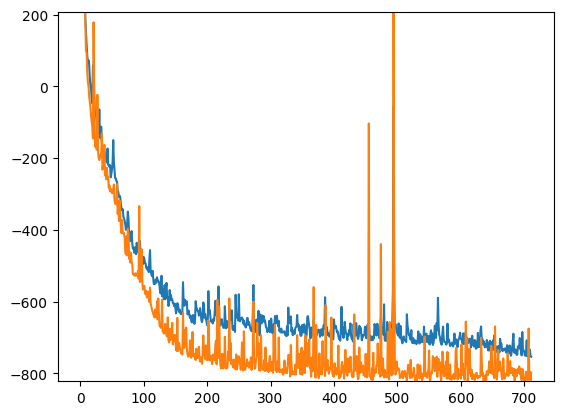

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.70565  validloss 10.60127±0.00000  bestvalidloss 10.60127  last_update 0
train: iter 1  trainloss 8.82994  validloss 9.58359±0.00000  bestvalidloss 9.58359  last_update 0
train: iter 2  trainloss 8.08212  validloss 8.72706±0.00000  bestvalidloss 8.72706  last_update 0
train: iter 3  trainloss 7.41583  validloss 8.02485±0.00000  bestvalidloss 8.02485  last_update 0
train: iter 4  trainloss 6.87468  validloss 7.40213±0.00000  bestvalidloss 7.40213  last_update 0
train: iter 5  trainloss 6.38674  validloss 6.90206±0.00000  bestvalidloss 6.90206  last_update 0
train: iter 6  trainloss 5.96338  validloss 6.40324±0.00000  bestvalidloss 6.40324  last_update 0
train: iter 7  trainloss 5.59235  validloss 5.98195±0.00000  bestvalidloss 5.98195  last_update 0
train: iter 8  trainloss 5.26709  validloss 5.62230±0.00000  bestvalidloss 5.62230  last_update 0
train: iter 9  trainloss 4.97106  validloss 5.29572±0.00000  bestvalidloss 5.29572  last_update 0
train: iter 10  tr

train: iter 87  trainloss 0.96357  validloss 0.92224±0.00000  bestvalidloss 0.92224  last_update 0
train: iter 88  trainloss 0.94044  validloss 0.89449±0.00000  bestvalidloss 0.89449  last_update 0
train: iter 89  trainloss 0.91855  validloss 0.86001±0.00000  bestvalidloss 0.86001  last_update 0
train: iter 90  trainloss 0.89228  validloss 0.82906±0.00000  bestvalidloss 0.82906  last_update 0
train: iter 91  trainloss 0.87701  validloss 0.80870±0.00000  bestvalidloss 0.80870  last_update 0
train: iter 92  trainloss 0.86034  validloss 0.77818±0.00000  bestvalidloss 0.77818  last_update 0
train: iter 93  trainloss 0.84343  validloss 0.77028±0.00000  bestvalidloss 0.77028  last_update 0
train: iter 94  trainloss 0.82154  validloss 0.73850±0.00000  bestvalidloss 0.73850  last_update 0
train: iter 95  trainloss 0.81508  validloss 0.71886±0.00000  bestvalidloss 0.71886  last_update 0
train: iter 96  trainloss 0.78888  validloss 0.70021±0.00000  bestvalidloss 0.70021  last_update 0
train: ite

train: iter 173  trainloss 0.69984  validloss 0.45542±0.00000  bestvalidloss 0.42528  last_update 9
train: iter 174  trainloss 0.69387  validloss 0.44987±0.00000  bestvalidloss 0.42528  last_update 10
train: iter 175  trainloss 0.67558  validloss 0.44559±0.00000  bestvalidloss 0.42528  last_update 11
train: iter 176  trainloss 0.69506  validloss 0.46018±0.00000  bestvalidloss 0.42528  last_update 12
train: iter 177  trainloss 0.68120  validloss 0.45241±0.00000  bestvalidloss 0.42528  last_update 13
train: iter 178  trainloss 0.69609  validloss 0.43652±0.00000  bestvalidloss 0.42528  last_update 14
train: iter 179  trainloss 0.68812  validloss 0.44505±0.00000  bestvalidloss 0.42528  last_update 15
train: iter 180  trainloss 0.68615  validloss 0.46547±0.00000  bestvalidloss 0.42528  last_update 16
train: iter 181  trainloss 0.69030  validloss 0.46569±0.00000  bestvalidloss 0.42528  last_update 17
train: iter 182  trainloss 0.66850  validloss 0.46996±0.00000  bestvalidloss 0.42528  last_u

train: iter 260  trainloss 0.68397  validloss 0.45505±0.00000  bestvalidloss 0.42297  last_update 58
train: iter 261  trainloss 0.66749  validloss 0.42575±0.00000  bestvalidloss 0.42297  last_update 59
train: iter 262  trainloss 0.67863  validloss 0.43934±0.00000  bestvalidloss 0.42297  last_update 60
train: iter 263  trainloss 0.67312  validloss 0.43603±0.00000  bestvalidloss 0.42297  last_update 61
train: iter 264  trainloss 0.68137  validloss 0.44669±0.00000  bestvalidloss 0.42297  last_update 62
train: iter 265  trainloss 0.69412  validloss 0.43927±0.00000  bestvalidloss 0.42297  last_update 63
train: iter 266  trainloss 0.68886  validloss 0.44011±0.00000  bestvalidloss 0.42297  last_update 64
train: iter 267  trainloss 0.69560  validloss 0.43576±0.00000  bestvalidloss 0.42297  last_update 65
train: iter 268  trainloss 0.67619  validloss 0.45520±0.00000  bestvalidloss 0.42297  last_update 66
train: iter 269  trainloss 0.71361  validloss 0.43436±0.00000  bestvalidloss 0.42297  last_

train: iter 351  trainloss 0.68422  validloss 0.47403±0.00000  bestvalidloss 0.40544  last_update 73
train: iter 352  trainloss 0.68587  validloss 0.45272±0.00000  bestvalidloss 0.40544  last_update 74
train: iter 353  trainloss 0.67659  validloss 0.45811±0.00000  bestvalidloss 0.40544  last_update 75
train: iter 354  trainloss 0.69338  validloss 0.43233±0.00000  bestvalidloss 0.40544  last_update 76
train: iter 355  trainloss 0.69954  validloss 0.46221±0.00000  bestvalidloss 0.40544  last_update 77
train: iter 356  trainloss 0.70715  validloss 0.44715±0.00000  bestvalidloss 0.40544  last_update 78
train: iter 357  trainloss 0.67403  validloss 0.47645±0.00000  bestvalidloss 0.40544  last_update 79
train: iter 358  trainloss 0.69563  validloss 0.44356±0.00000  bestvalidloss 0.40544  last_update 80
train: iter 359  trainloss 0.69692  validloss 0.43305±0.00000  bestvalidloss 0.40544  last_update 81
train: iter 360  trainloss 0.68658  validloss 0.44036±0.00000  bestvalidloss 0.40544  last_

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-4.2772, -1.4612], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 11.50150  validloss 17.42025±0.00000  bestvalidloss 17.42025  last_update 0
train: iter 1  trainloss 6.35165  validloss 9.24475±0.00000  bestvalidloss 9.24475  last_update 0
train: iter 2  trainloss 4.28880  validloss 5.21733±0.00000  bestvalidloss 5.21733  last_update 0
train: iter 3  trainloss 3.63540  validloss 3.52461±0.00000  bestvalidloss 3.52461  last_update 0
train: iter 4  trainloss 3.37947  validloss 2.71778±0.00000  bestvalidloss 2.71778  last_update 0
train: iter 5  trainloss 3.22530  validloss 2.54519±0.00000  bestvalidloss 2.54519  last_update 0
train: iter 6  trainloss 3.00022  validloss 2.34172±0.00000  bestvalidloss 2.34172  last_update 0
train: iter 7  trainloss 2.81100  validloss 2.31221±0.00000  bestvalidloss 2.31221  last_update 0
train: iter 8  trainloss 2.62881  validloss 2.07615±0.00000  bestvalidloss 2.07615  last_update 0
train: iter 9  trainloss 2.36078  validloss 2.11262±0.00000  bestvalidloss 2.07615  last_update 1
train: iter 10  t

train: iter 83  trainloss 1.37538  validloss 1.24076±0.00000  bestvalidloss 1.20125  last_update 33
train: iter 84  trainloss 1.40959  validloss 1.20593±0.00000  bestvalidloss 1.20125  last_update 34
train: iter 85  trainloss 1.37812  validloss 1.28224±0.00000  bestvalidloss 1.20125  last_update 35
train: iter 86  trainloss 1.36826  validloss 1.27868±0.00000  bestvalidloss 1.20125  last_update 36
train: iter 87  trainloss 1.40378  validloss 1.33864±0.00000  bestvalidloss 1.20125  last_update 37
train: iter 88  trainloss 1.36180  validloss 1.33552±0.00000  bestvalidloss 1.20125  last_update 38
train: iter 89  trainloss 1.38374  validloss 1.25668±0.00000  bestvalidloss 1.20125  last_update 39
train: iter 90  trainloss 1.38776  validloss 1.23247±0.00000  bestvalidloss 1.20125  last_update 40
train: iter 91  trainloss 1.36914  validloss 1.39153±0.00000  bestvalidloss 1.20125  last_update 41
train: iter 92  trainloss 1.36031  validloss 1.35378±0.00000  bestvalidloss 1.20125  last_update 42


train: iter 167  trainloss 1.42235  validloss 1.25347±0.00000  bestvalidloss 1.18412  last_update 43
train: iter 168  trainloss 1.34952  validloss 1.30974±0.00000  bestvalidloss 1.18412  last_update 44
train: iter 169  trainloss 1.36858  validloss 1.41383±0.00000  bestvalidloss 1.18412  last_update 45
train: iter 170  trainloss 1.35031  validloss 1.32737±0.00000  bestvalidloss 1.18412  last_update 46
train: iter 171  trainloss 1.36669  validloss 1.29922±0.00000  bestvalidloss 1.18412  last_update 47
train: iter 172  trainloss 1.35342  validloss 1.26971±0.00000  bestvalidloss 1.18412  last_update 48
train: iter 173  trainloss 1.35943  validloss 1.37822±0.00000  bestvalidloss 1.18412  last_update 49
train: iter 174  trainloss 1.37176  validloss 1.26067±0.00000  bestvalidloss 1.18412  last_update 50
train: iter 175  trainloss 1.35701  validloss 1.23931±0.00000  bestvalidloss 1.18412  last_update 51
train: iter 176  trainloss 1.36902  validloss 1.36462±0.00000  bestvalidloss 1.18412  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-5.7384)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.0266)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.18578329082112913
tensor([-0.3224])
